Predicting heart disease using machine learning

Target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
#https://www.kaggle.com/faressayah/predicting-heart-disease-using-machine-learning

In [72]:
data=pd.read_csv('heart.csv')
data.head()

,slope,thal,resting BP,Chest Pain,num_major_vessels,fasting_BldSug,resting_ekg_results,serum_cholesterol,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,target
0,1,normal,128,2,0,0,2,308,0.00,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.60,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.00,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.00,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.20,1,59,145,0,0


Exploratory Data Analysis (EDA)

In [73]:
data.info

<bound method DataFrame.info of      slope               thal  resting BP  Chest Pain  num_major_vessels  \
0        1             normal         128           2                  0   
1        2             normal         110           3                  0   
2        1             normal         125           4                  3   
3        1  reversible_defect         152           4                  0   
4        3  reversible_defect         178           1                  0   
..     ...                ...         ...         ...                ...   
175      2  reversible_defect         125           4                  2   
176      2             normal         180           4                  0   
177      2  reversible_defect         125           3                  0   
178      1             normal         124           3                  2   
179      1             normal         160           3                  1   

     fasting_BldSug  resting_ekg_results  serum_cholest

# Exploratory Data Analysis (EDA)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   slope                     180 non-null    int64  
 1   thal                      180 non-null    object 
 2   resting BP                180 non-null    int64  
 3   Chest Pain                180 non-null    int64  
 4   num_major_vessels         180 non-null    int64  
 5   fasting_BldSug            180 non-null    int64  
 6   resting_ekg_results       180 non-null    int64  
 7   serum_cholesterol         180 non-null    int64  
 8   oldpeak_eq_st_depression  180 non-null    float64
 9   sex                       180 non-null    int64  
 10  age                       180 non-null    int64  
 11  max_heart_rate_achieved   180 non-null    int64  
 12  exercise_induced_angina   180 non-null    int64  
 13  target                    180 non-null    int64  
dtypes: float64

In [75]:
data.shape

(180, 14)

In [76]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,slope,resting BP,Chest Pain,num_major_vessels,fasting_BldSug,resting_ekg_results,serum_cholesterol,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,target
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00
mean,1.55,131.31,3.16,0.69,0.16,1.05,249.21,1.01,0.69,54.81,149.48,0.32,0.44
std,0.62,17.01,0.94,0.97,0.37,1.00,52.72,1.12,0.46,9.33,22.06,0.47,0.50
min,1.00,94.00,1.00,0.00,0.00,0.00,126.00,0.00,0.00,29.00,96.00,0.00,0.00
25%,1.00,120.00,3.00,0.00,0.00,0.00,213.75,0.00,0.00,48.00,132.00,0.00,0.00
50%,1.00,130.00,3.00,0.00,0.00,2.00,245.50,0.80,1.00,55.00,152.00,0.00,0.00
75%,2.00,140.00,4.00,1.00,0.00,2.00,281.25,1.60,1.00,62.00,166.25,1.00,1.00
max,3.00,180.00,4.00,3.00,1.00,2.00,564.00,6.20,1.00,77.00,202.00,1.00,1.00


In [77]:
data.target.value_counts()

0    100
1     80
Name: target, dtype: int64

In [78]:
data.target.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: target, Length: 180, dtype: int64>

In [79]:
data.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (target)

In [80]:
#checking the missing values
data.isnull().sum()

slope                       0
thal                        0
resting BP                  0
Chest Pain                  0
num_major_vessels           0
fasting_BldSug              0
resting_ekg_results         0
serum_cholesterol           0
oldpeak_eq_st_depression    0
sex                         0
age                         0
max_heart_rate_achieved     0
exercise_induced_angina     0
target                      0
dtype: int64

# 📌 Notes:
# We have 80 person with heart disease and 100 person without heart disease, so our problem is balanced.
# Looks like the perfect dataset!!! No null values :-)

In [81]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [82]:
categorical_val

['slope',
 'thal',
 'Chest Pain',
 'num_major_vessels',
 'fasting_BldSug',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina',
 'target']

In [83]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [84]:
have_disease = data.loc[data['target']==1, 'Chest Pain'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'Chest Pain'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Chest_Pain.I  :Bars   [index]   (Chest Pain)
   .Bars.Chest_Pain.II :Bars   [index]   (Chest Pain)

In [85]:
have_disease = data.loc[data['target']==1, 'fasting_BldSug'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'fasting_BldSug'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fasting_BldSug.I  :Bars   [index]   (fasting_BldSug)
   .Bars.Fasting_BldSug.II :Bars   [index]   (fasting_BldSug)

In [86]:
have_disease = data.loc[data['target']==1, 'num_major_vessels'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'num_major_vessels'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by num_major_vessels", xlabel='num_major_vessels', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Num_major_vessels.I  :Bars   [index]   (num_major_vessels)
   .Bars.Num_major_vessels.II :Bars   [index]   (num_major_vessels)

In [87]:
have_disease = data.loc[data['target']==1, 'resting_ekg_results'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'resting_ekg_results'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Resting_ekg_results.I  :Bars   [index]   (resting_ekg_results)
   .Bars.Resting_ekg_results.II :Bars   [index]   (resting_ekg_results)

In [88]:
have_disease = data.loc[data['target']==1, 'exercise_induced_angina'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'exercise_induced_angina'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by exercise_induced_angina", xlabel='exercise_induced_angina', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Exercise_induced_angina.I  :Bars   [index]   (exercise_induced_angina)
   .Bars.Exercise_induced_angina.II :Bars   [index]   (exercise_induced_angina)

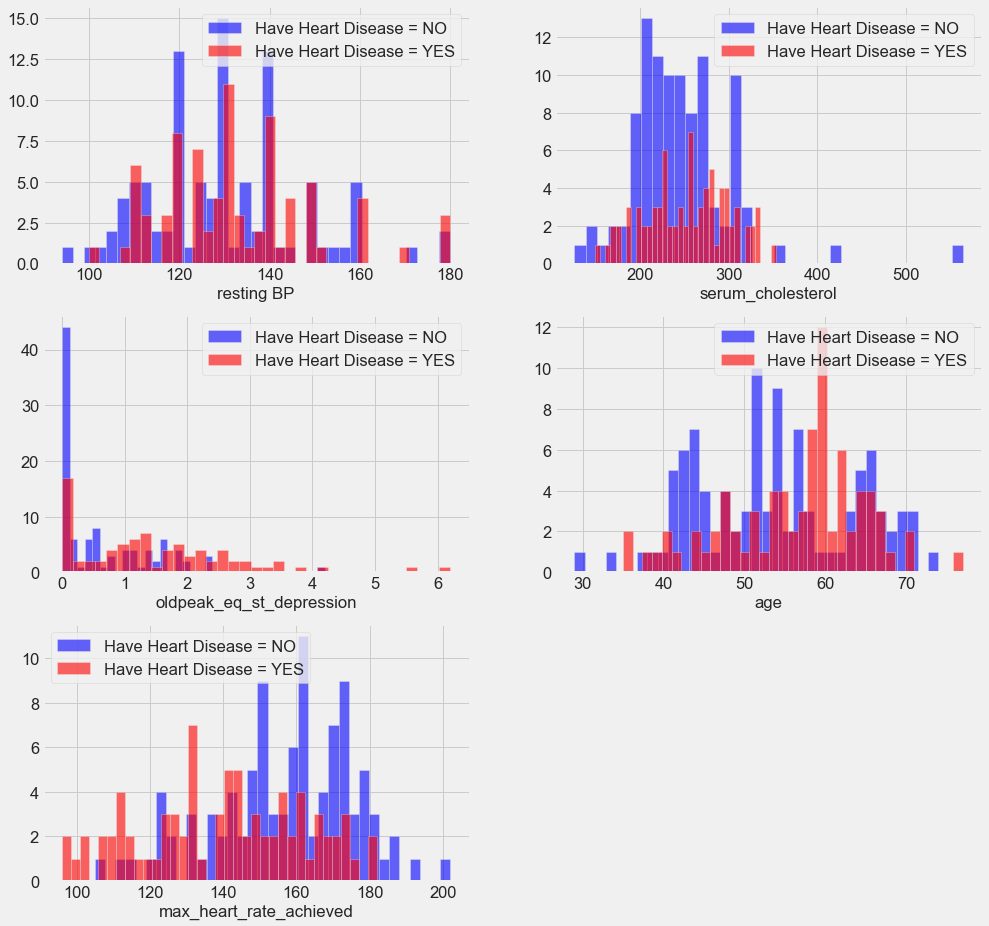

In [89]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [90]:
data.columns

Index(['slope', 'thal', 'resting BP', 'Chest Pain', 'num_major_vessels',
       'fasting_BldSug', 'resting_ekg_results', 'serum_cholesterol',
       'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'target'],
      dtype='object')

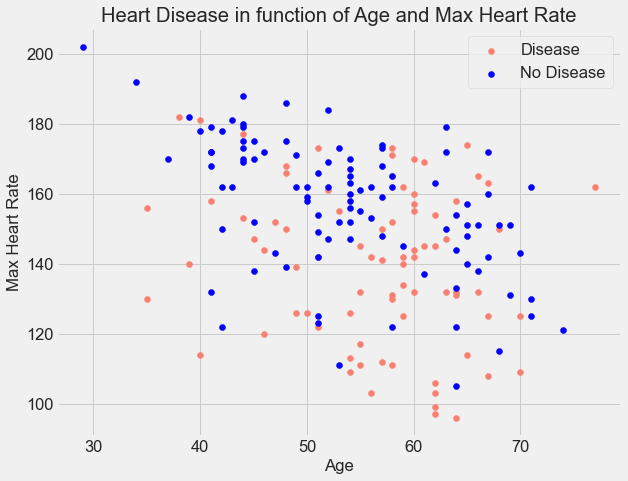

In [91]:
#Create another figure
plt.figure(figsize=(9,7))

#Scatter with positive 
plt.scatter(data.age[data.target==1],
            data.max_heart_rate_achieved[data.target==1],
            c='salmon')
# Scatter with negative

plt.scatter(data.age[data.target==0],
            data.max_heart_rate_achieved[data.target==0],
            c='blue')
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# Correlation Matrix

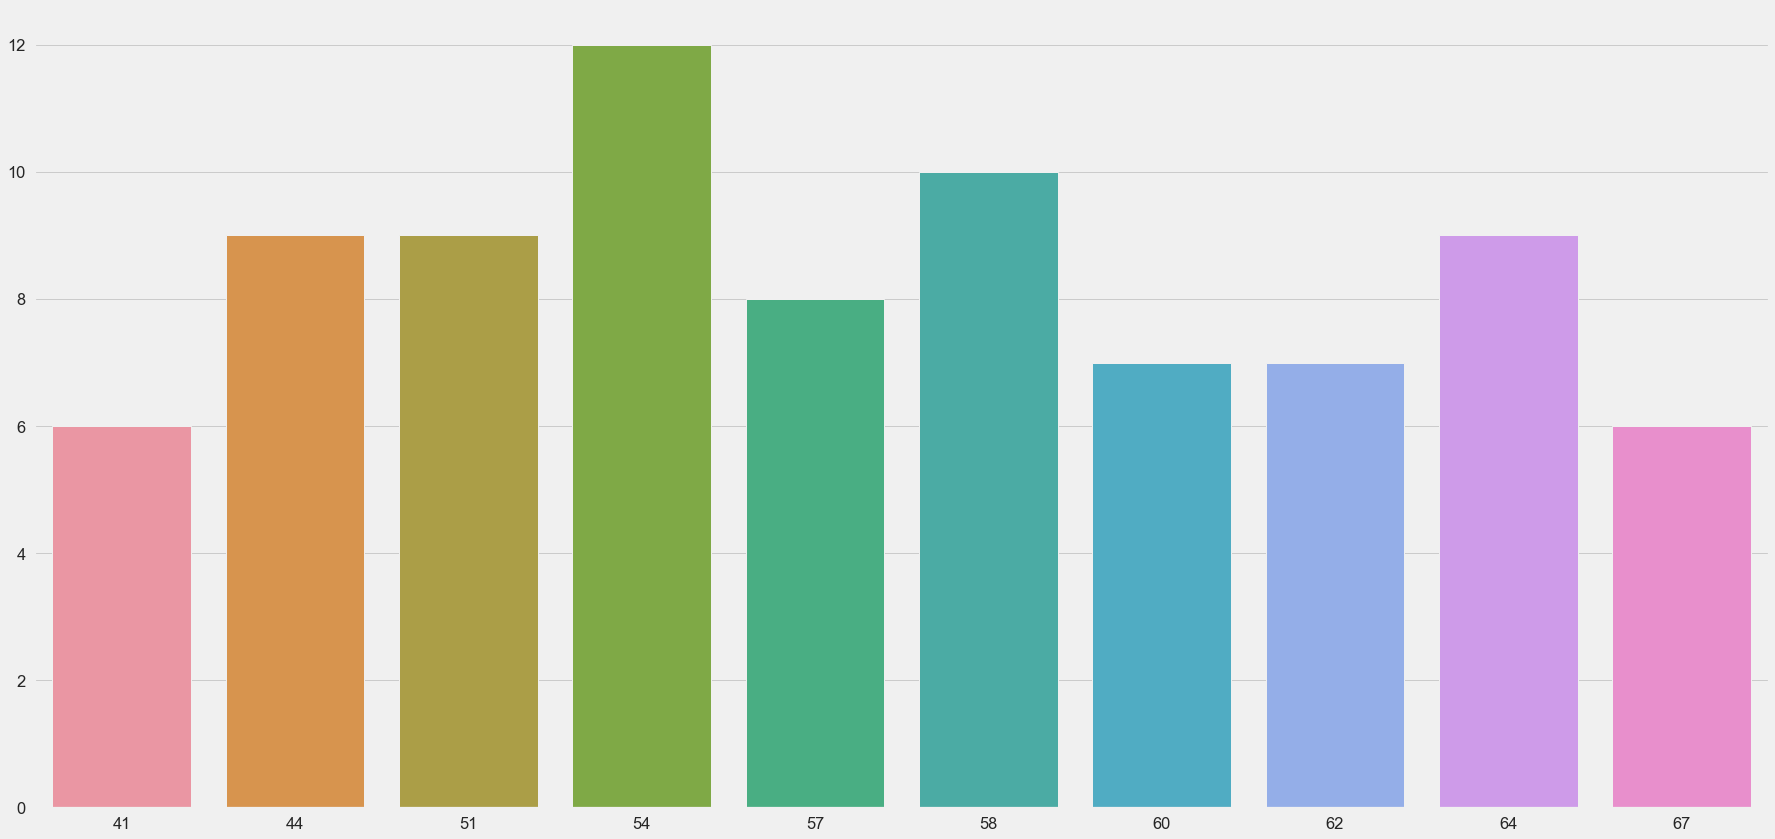

In [92]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

In [93]:
#Let’s check the range of age in the dataset.
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.81111111111111


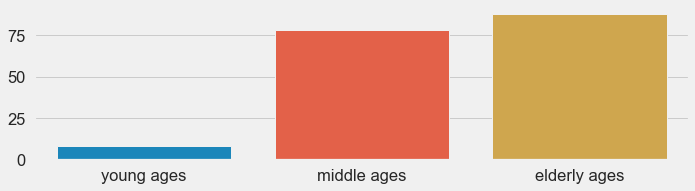

In [94]:
#We should divide the Age feature into three parts – “Young”, “Middle” and “Elder”
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(10,3))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

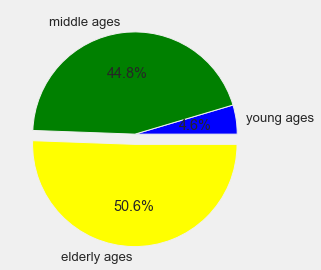

In [95]:
#To prove the above inference we will plot the pie chart.
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(7,4))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

C:\Users\ekote\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


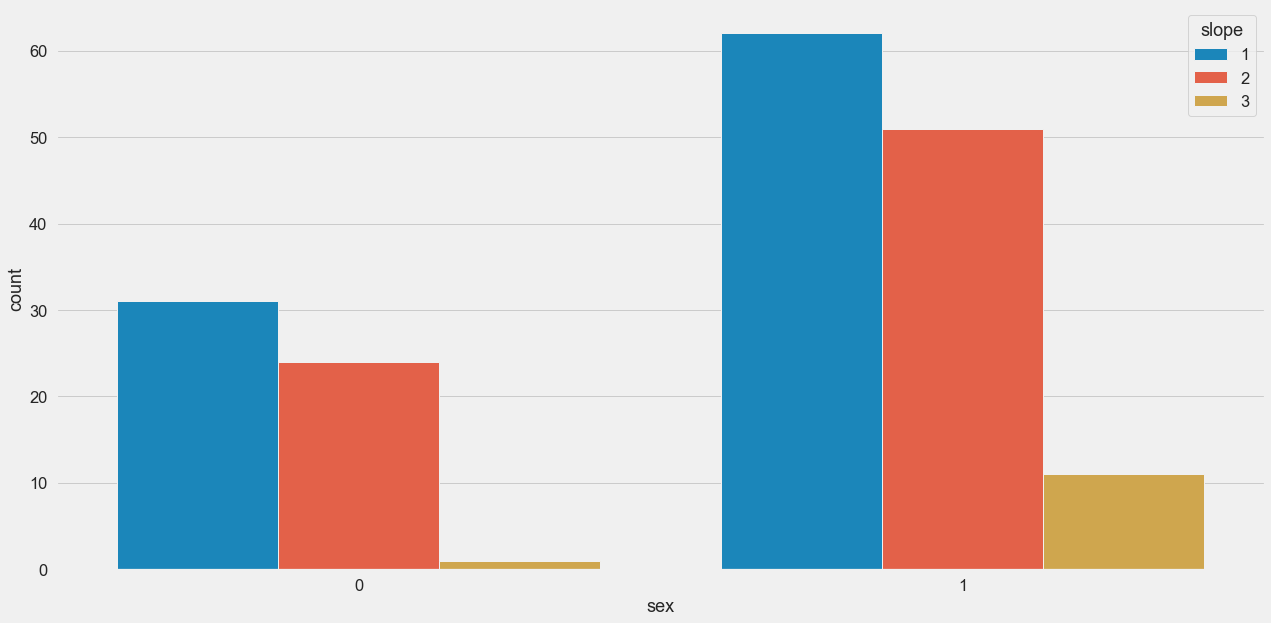

In [96]:
#Now let’s plot the relation between sex and slope
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["slope"])
plt.tight_layout()

(13.5, -0.5)

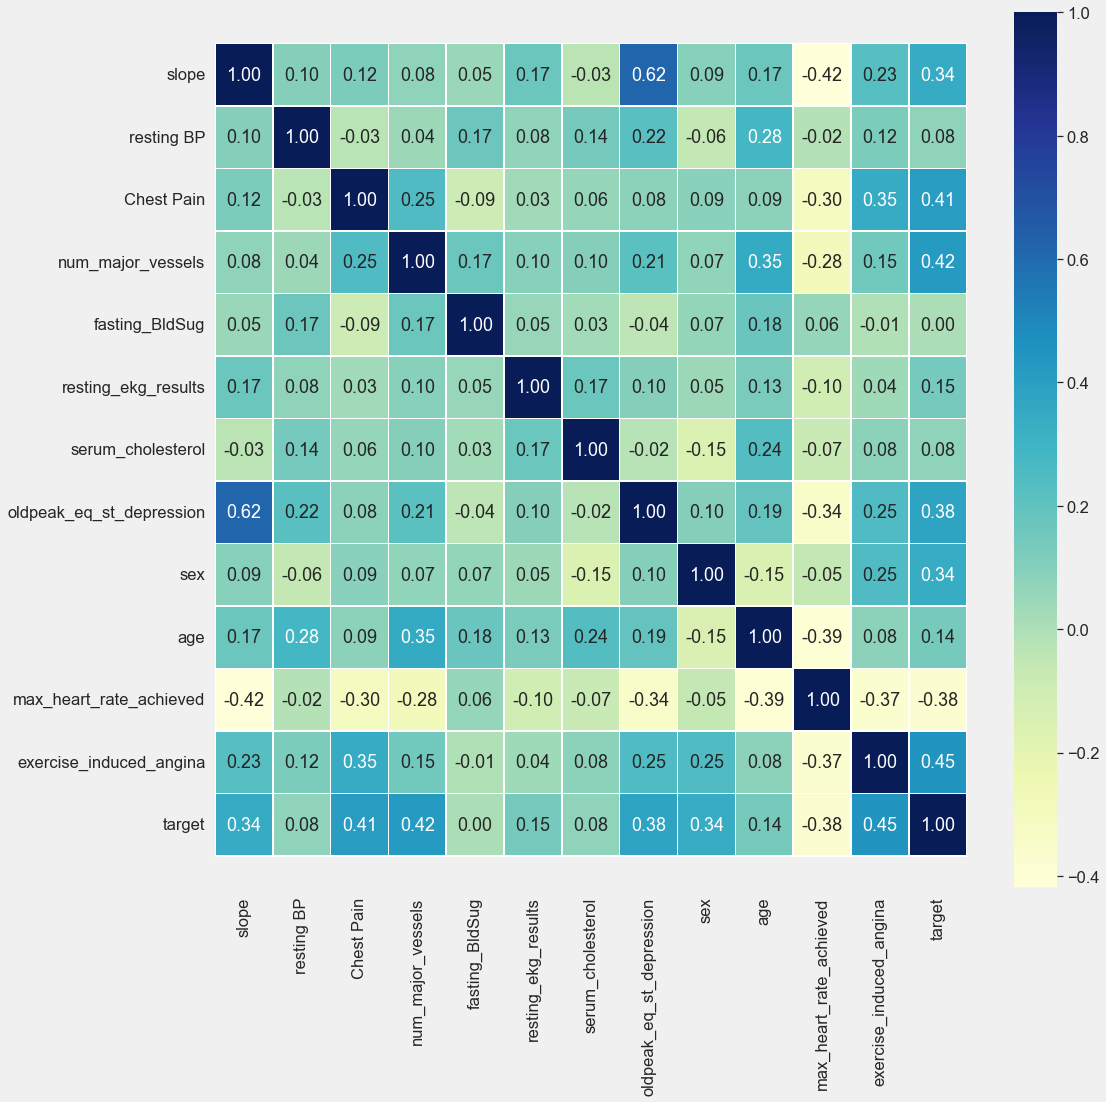

In [97]:


# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [98]:
data.drop('target', axis=1).corrwith(data.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

# Data Processing

In [99]:
dataset = pd.get_dummies(data, columns = categorical_val)

In [100]:
data.head()

,slope,thal,resting BP,Chest Pain,num_major_vessels,fasting_BldSug,resting_ekg_results,serum_cholesterol,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,target
0,1,normal,128,2,0,0,2,308,0.00,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.60,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.00,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.00,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.20,1,59,145,0,0


In [101]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['oldpeak_eq_st_depression','thal_reversible_defect']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [102]:
data.head()

,slope,thal,resting BP,Chest Pain,num_major_vessels,fasting_BldSug,resting_ekg_results,serum_cholesterol,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,target
0,1,normal,128,2,0,0,2,308,0.00,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.60,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.00,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.00,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.20,1,59,145,0,0


In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [104]:
data.drop('thal',axis=1, inplace=True)

In [105]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models Building

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1.Logistic Regression

2.K-Nearest Neighbours Classifier

3.Support Vector machine

4.Decision Tree Classifier

5.Random Forest Classifier

6.XGBoost Classifier

# 1. Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.86  0.85      0.86       0.86          0.86
recall     0.91  0.78      0.86       0.85          0.86
f1-score   0.88  0.82      0.86       0.85          0.86
support   75.00 51.00      0.86     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[68  7]
 [11 40]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.84      0.78       0.78          0.79
recall     0.84  0.72      0.78       0.78          0.78
f1-score   0.78  0.78      0.78       0.78          0.78
support   25.00 29.00      0.78      54.00         54.00
_______________________________________________
Confusion Matrix: 
 [[21  4]
 [ 8 21]]



In [108]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.71,77.78


# 2. K-nearest neighbors

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 72.22%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.72      0.72       0.72          0.72
recall     0.87  0.51      0.72       0.69          0.72
f1-score   0.79  0.60      0.72       0.69          0.71
support   75.00 51.00      0.72     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[65 10]
 [25 26]]

Test Result:
Accuracy Score: 51.85%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.49  0.62      0.52       0.55          0.56
recall     0.80  0.28      0.52       0.54          0.52
f1-score   0.61  0.38      0.52       0.49          0.49
support   25.00 29.00      0.52      54.00         54.00
_______________________________________________
Confusion Matrix: 
 [[20  5]
 [21  8]]



In [110]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.71,77.78
1,K-nearest neighbors,72.22,51.85


# 3. Support Vector machine

In [111]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   75.00 51.00      1.00     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[75  0]
 [ 0 51]]

Test Result:
Accuracy Score: 46.30%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.46  0.00      0.46       0.23          0.21
recall     1.00  0.00      0.46       0.50          0.46
f1-score   0.63  0.00      0.46       0.32          0.29
support   25.00 29.00      0.46      54.00         54.00
_______________________________________________
Confusion Matrix: 
 [[25  0]
 [29  0]]



C:\Users\ekote\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ekote\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ekote\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.71,77.78
1,K-nearest neighbors,72.22,51.85
2,Support Vector Machine,100.00,46.30


# 4. Decision Tree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   75.00 51.00      1.00     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[75  0]
 [ 0 51]]

Test Result:
Accuracy Score: 72.22%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.67  0.79      0.72       0.73          0.73
recall     0.80  0.66      0.72       0.73          0.72
f1-score   0.73  0.72      0.72       0.72          0.72
support   25.00 29.00      0.72      54.00         54.00
_______________________________________________
Confusion Matrix: 
 [[20  5]
 [10 19]]



In [114]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.71,77.78
1,K-nearest neighbors,72.22,51.85
2,Support Vector Machine,100.00,46.30
3,Decision Tree Classifier,100.00,72.22


# 5. Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   75.00 51.00      1.00     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[75  0]
 [ 0 51]]

Test Result:
Accuracy Score: 75.93%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.68  0.90      0.76       0.79          0.80
recall     0.92  0.62      0.76       0.77          0.76
f1-score   0.78  0.73      0.76       0.76          0.76
support   25.00 29.00      0.76      54.00         54.00
_______________________________________________
Confusion Matrix: 
 [[23  2]
 [11 18]]



In [116]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.71,77.78
1,K-nearest neighbors,72.22,51.85
2,Support Vector Machine,100.00,46.30
3,Decision Tree Classifier,100.00,72.22
4,Random Forest Classifier,100.00,75.93


# 6. XGBoost Classifer

In [117]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

[21:47:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   75.00 51.00      1.00     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[75  0]
 [ 0 51]]

Test Result:
Accuracy Score: 79.63%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.91      0.80       0.81  

In [118]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.71,77.78
1,K-nearest neighbors,72.22,51.85
2,Support Vector Machine,100.00,46.30
3,Decision Tree Classifier,100.00,72.22
4,Random Forest Classifier,100.00,75.93
5,XGBoost Classifier,100.00,79.63


# Models Hyperparameter Tuning

## 1. Logistic Regression Hyperparameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 545.5594781168514, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 86.51%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.86  0.87      0.87       0.87          0.87
recall     0.92  0.78      0.87       0.85          0.87
f1-score   0.89  0.82      0.87       0.86          0.86
support   75.00 51.00      0.87     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[69  6]
 [11 40]]

Test Result:
Accuracy Score: 81.48%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.76  0.88      0.81       0.82          0.82
recall     0.88  0.76      0.81       0.82          0.81
f1-score   0.81  0.81      0.81       0.81          0.81
support   25.00 29.00      0.81      54.00         54.00


In [120]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.51,81.48


## 2. K-nearest neighbors Hyperparameter Tuning

In [121]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


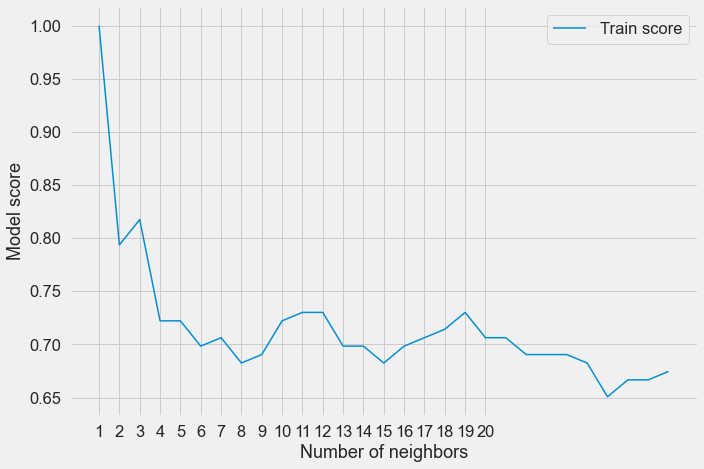

In [122]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [123]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 66.67%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.66  0.68      0.67       0.67          0.67
recall     0.89  0.33      0.67       0.61          0.67
f1-score   0.76  0.45      0.67       0.60          0.63
support   75.00 51.00      0.67     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[67  8]
 [34 17]]

Test Result:
Accuracy Score: 44.44%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.44  0.45      0.44       0.45          0.45
recall     0.76  0.17      0.44       0.47          0.44
f1-score   0.56  0.25      0.44       0.40          0.39
support   25.00 29.00      0.44      54.00         54.00
_______________________________________________
Confusion Matrix: 
 [[19  6]
 [24  5]]



In [124]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.51,81.48
1,Tuned K-nearest neighbors,66.67,44.44


In [125]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
Train Result:
Accuracy Score: 92.06%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.91  0.94      0.92       0.92          0.92
recall     0.96  0.86      0.92       0.91          0.92
f1-score   0.94  0.90      0.92       0.92          0.92
support   75.00 51.00      0.92     126.00        126.00
_______________________________________________
Confusion Matrix: 
 [[72  3]
 [ 7 44]]

Test Result:
Accuracy Score: 79.63%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.91      0.80       0.81          0.82
recall     0.92  0.69      0.80       0.80          0.80
f1-score   0.81  0.78      0.80       0.80          0.7

In [126]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.51,81.48
1,Tuned K-nearest neighbors,66.67,44.44
2,Tuned Decision Tree Classifier,92.06,79.63


In [127]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.71,77.78
1,K-nearest neighbors,72.22,51.85
2,Support Vector Machine,100.00,46.30
3,Decision Tree Classifier,100.00,72.22
4,Random Forest Classifier,100.00,75.93
5,XGBoost Classifier,100.00,79.63


### 6. Features Importance According to Random Forest and XGBoost

In [128]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<AxesSubplot:>

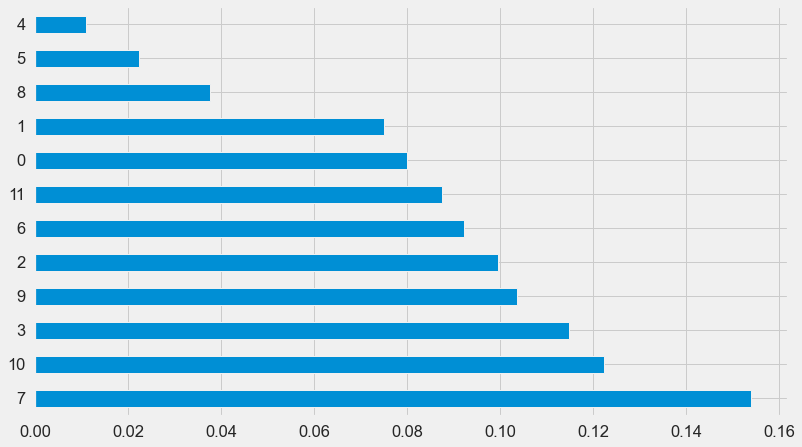

In [129]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

<AxesSubplot:>

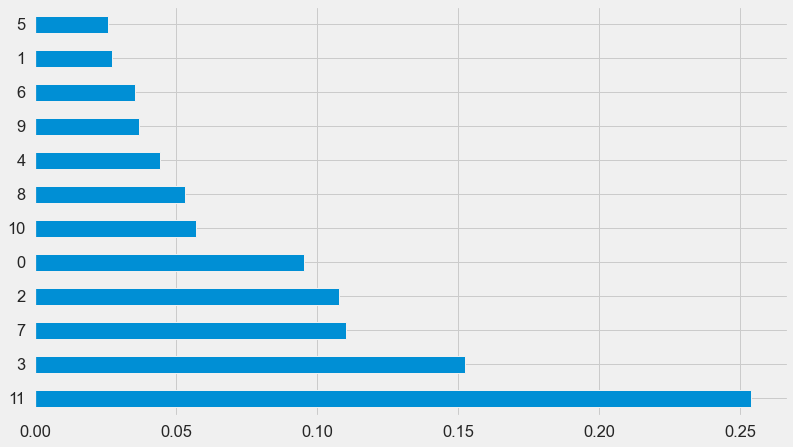

In [130]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)